In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier 
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [4]:
dataframe= pd.read_csv("/content/preprocessed_data.csv")

In [5]:
dataframe.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,0,0
2,55,5,1,0,0,0,0,0,3,1,550,1,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,1,0
4,55,5,0,6,0,0,0,0,4,3,368,2,1,0


In [6]:
print('Shape of the data is: ',dataframe.shape)

Shape of the data is:  (32950, 14)


**Preparing Training and Test Data**

In [7]:
X = dataframe.iloc[:,:-1]

# Target
y = dataframe.iloc[:,-1]
pd.value_counts(y)

0    29238
1     3712
Name: y, dtype: int64

In [8]:
# Predictors
X = dataframe.iloc[:,:-1]

# Target
y = dataframe.iloc[:,-1]
pd.value_counts(y)

# Dividing the data into train and test subsets
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((26360, 13), (6590, 13), (26360,), (6590,))

In [9]:
# run Logistic Regression model
model = LogisticRegression()
# fitting the model
model.fit(x_train, y_train)
# predicting the values
y_scores = model.predict(x_val)
y_scores

array([0, 0, 0, ..., 0, 0, 0])

In [10]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_val,y_scores)
print("classification report :", clf_rpt)

classification report :               precision    recall  f1-score   support

           0       0.90      0.98      0.93      5798
           1       0.50      0.17      0.25       792

    accuracy                           0.88      6590
   macro avg       0.70      0.57      0.59      6590
weighted avg       0.85      0.88      0.85      6590



AREA UNDER THE CURVE IS :  0.5714912578701817
ROC_AUC_SCORE is 0.5714912578701817


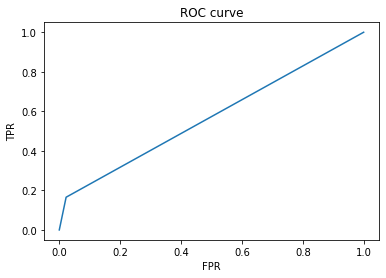

In [11]:
# getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
print("AREA UNDER THE CURVE IS : ", auc)
# print('Classification Report:')
# print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
# #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [13]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.1 MB/s 


In [14]:
# Run Decision Tree Classifier
dtcmodel = DecisionTreeClassifier()

dtcmodel.fit(x_train, y_train)
y_scores = dtcmodel.predict(x_val)
y_scores

array([0, 1, 0, ..., 0, 0, 0])

In [15]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_val,y_scores)
print("classification report :", clf_rpt)

classification report :               precision    recall  f1-score   support

           0       0.93      0.93      0.93      5798
           1       0.47      0.46      0.46       792

    accuracy                           0.87      6590
   macro avg       0.70      0.69      0.69      6590
weighted avg       0.87      0.87      0.87      6590



AREA UNDER THE CURVE IS :  0.6922883108421226
ROC_AUC_SCORE is 0.6922883108421226


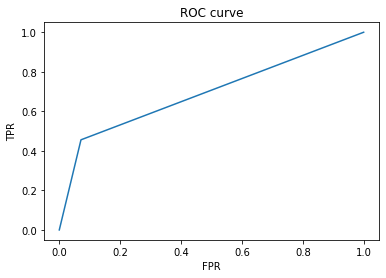

In [16]:
# getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
print("AREA UNDER THE CURVE IS : ", auc)
# print('Classification Report:')
# print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [17]:
# from sklearn import tree
# from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
# from IPython.display import SVG
# from graphviz import Source
# from IPython.display import display
# from ipywidgets import interactive, IntSlider, FloatSlider, interact
# import ipywidgets
# from IPython.display import Image
# from subprocess import call
# import matplotlib.image as mpimg

In [18]:
# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# from sklearn import tree
# from IPython.display import SVG
# from graphviz import Source
# from IPython.display import display

In [19]:
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt


In [20]:
# plot_tree(model, filled=True)
# plt.title("Decision tree")
# plt.figure(figsize= (10,10)) 
# plt.show()


In [21]:
# graph = Source(tree.export_graphviz(model, out_file=None
#    , feature_names=x_train.columns, class_names=['0', '1'] 
#    , filled = True))
# display(SVG(graph.pipe(format='svg')))

In [22]:
# @interact
# def plot_tree(crit=["gini", "entropy"],
#               split=["best", "random"],
#               depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
#               min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
#               min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
#     estimator = DecisionTreeClassifier(random_state=0,
#                                        criterion=crit,
#                                        splitter = split,
#                                        max_depth = depth,
#                                        min_samples_split=min_split,
#                                        min_samples_leaf=min_leaf)
#     estimator.fit(x_train, y_train)
#     print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(x_train))))
#     print('Decision Tree Test Accuracy: {:.3f}'.format(accuracy_score(y_val, estimator.predict(x_val))))

#     graph = Source(tree.export_graphviz(estimator,
#                                         out_file=None,
#                                         feature_names=x_train.columns,
#                                         class_names=['0', '1'],
#                                         filled = True))
    
#     display(Image(data=graph.pipe(format='png')))
    
#     return estimator

In [23]:
# run Random Forrest Classifier
rfcmodel = RandomForestClassifier()

rfcmodel.fit(x_train, y_train)
y_scores = rfcmodel.predict(x_val)

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_val,y_scores)
print("classification report :", clf_rpt)

classification report :               precision    recall  f1-score   support

           0       0.91      0.97      0.94      5798
           1       0.62      0.34      0.44       792

    accuracy                           0.90      6590
   macro avg       0.77      0.65      0.69      6590
weighted avg       0.88      0.90      0.88      6590



AREA UNDER THE CURVE IS :  0.6541314315977993
ROC_AUC_SCORE is 0.6541314315977993


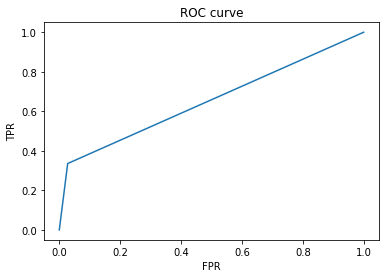

In [25]:
auc = roc_auc_score(y_val, y_scores)
print("AREA UNDER THE CURVE IS : ", auc)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [26]:
from sklearn.feature_selection import RFE
# Selecting 8 number of features
#   selecting models
models = LogisticRegression()
#   using  rfe and selecting 8 features
rfe = RFE(models,n_features_to_select=8, step=1)
#   fitting the model
rfe = rfe.fit(X,y)
#   ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()
print('Features  to be selected for Logistic Regression model are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())
print('===='*30)

Features  to be selected for Logistic Regression model are:
['job', 'marital', 'education', 'housing', 'contact', 'day_of_week', 'campaign', 'poutcome']


In [27]:
# Selecting 8 number of features
# Random Forrest classifier model
models = RandomForestClassifier()
#   using  rfe and selecting 8 features
rfe = RFE(models,n_features_to_select=8,step = 1)
#   fitting the model
rfe = rfe.fit(X,y)
#   ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()
print('Features  to be selected for Random Forrest Classifier are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())
print('===='*30)

Features  to be selected for Random Forrest Classifier are:
['age', 'job', 'education', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome']


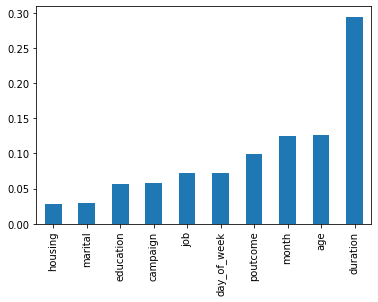

In [28]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# selecting the data
rfc = RandomForestClassifier(random_state=42)
# fitting the data
rfc.fit(X_train, y_train)
# predicting the data
y_pred = rfc.predict(X_test)
# feature importances
rfc_importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values().tail(10)
# plotting bar chart according to feature importance
rfc_importances.plot(kind='bar')
plt.show()

In [29]:
# splitting the data
x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
# selecting the classifier
rfc = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
# fitting the model
grid_search_model.fit(x_train, y_train)
# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2'}


In [30]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from yellowbrick.classifier import roc_auc

              precision    recall  f1-score   support

           0       0.96      0.76      0.85      8723
           1       0.29      0.74      0.42      1162

    accuracy                           0.76      9885
   macro avg       0.62      0.75      0.63      9885
weighted avg       0.88      0.76      0.80      9885

[[6642 2081]
 [ 307  855]]


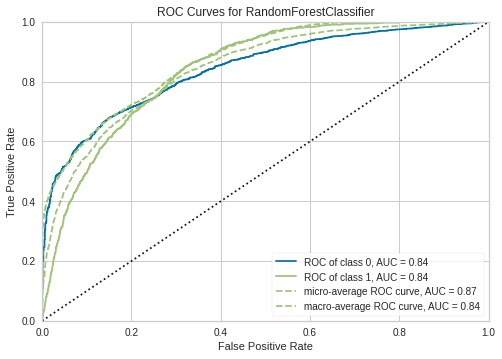

In [31]:
# A function to use smote
def grid_search_random_forrest_best(dataframe,target):
    
    # splitting the data
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTETomek(random_state=42)
    
    X_sm, y_sm =  smote.fit_resample(x_train, y_train)
    
    rfc = RandomForestClassifier(n_estimators=11, max_features='auto', max_depth=8, criterion='entropy',random_state=42)
    
    rfc.fit(X_sm, y_sm)
    y_pred = rfc.predict(x_val)
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    visualizer = roc_auc(rfc,X_sm,y_sm,x_val,y_val)


grid_search_random_forrest_best(X,y)

              precision    recall  f1-score   support

           0       0.96      0.82      0.88      8723
           1       0.36      0.77      0.49      1162

    accuracy                           0.81      9885
   macro avg       0.66      0.79      0.69      9885
weighted avg       0.89      0.81      0.84      9885

[[7120 1603]
 [ 264  898]]


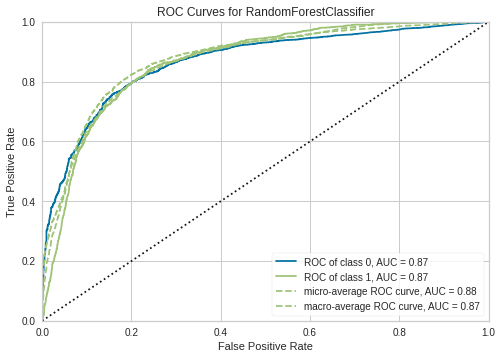

In [32]:
grid_search_random_forrest_best(X[['age', 'job', 'education', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome']],y)

**Ensembling**

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier


# splitting the data  
x_train,x_val,y_train,y_val = train_test_split(X, y, test_size=0.3, random_state=42)
# using smote
smote = SMOTE()
X_sm, y_sm =  smote.fit_resample(x_train, y_train)
# models to use for ensembling  
model1 = RandomForestClassifier()
model3 = GradientBoostingClassifier()
model2 = LogisticRegression()
# fitting the model
model = VotingClassifier(estimators=[('rf', model1), ('lr', model2), ('xgb',model3)], voting='soft')
model.fit(X_sm,y_sm)
# predicting balues and getting the metrics
y_pred = model.predict(x_val)

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      8723
           1       0.39      0.70      0.50      1162

    accuracy                           0.83      9885
   macro avg       0.67      0.78      0.70      9885
weighted avg       0.89      0.83      0.85      9885

[[7427 1296]
 [ 345  817]]


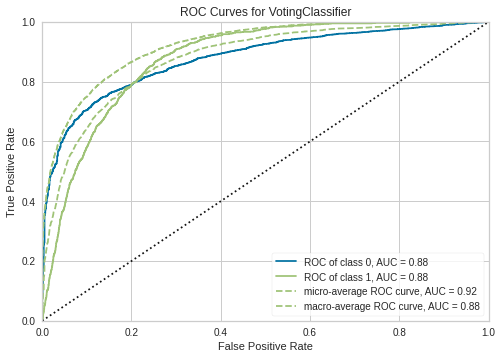

In [34]:
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
visualizer = roc_auc(model,X_sm,y_sm,x_val,y_val)

In [36]:
# Preprocessed Test File
test = pd.read_csv('/content/new_train.csv')
test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [51]:
smote = SMOTE()

X_sm, y_sm =  smote.fit_resample(x_train, y_train)


rfc = RandomForestClassifier()
 # selecting the parameter
param_grid = { 
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth' : [4,5,6,7,8],
 'criterion' :['gini', 'entropy']
              }
 # using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)

 # fitting the model
grid_search_model.fit(X_sm, y_sm)
    
 # Predict on the preprocessed test file
y_pred = grid_search_model.predict(X_test)
    
prediction = pd.DataFrame(y_pred,columns=['y'])


prediction.to_csv('submission.csv',index=False)